# 檢視 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = '/Users/gary/data_marathon/Part01'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: /Users/gary/data_marathon/Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 開始檢視不同欄位是否有異常值

In [3]:
# DAYS_BIRTH: 客戶申請貸款時的年齡
(app_train['DAYS_BIRTH'] / (-365)).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

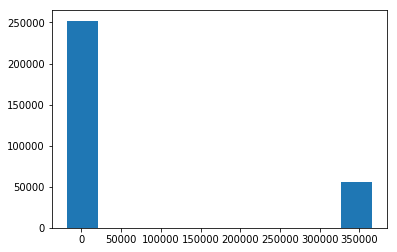

In [20]:
# DAYS_EMPLOYED: 申請貸款前，申請人已在現職工作的時間
(app_train['DAYS_EMPLOYED'] / 365).describe()
plt.hist(app_train['DAYS_EMPLOYED'])
plt.show()

In [19]:
pd.Series(int(i) for i in app_train['DAYS_EMPLOYED']/365).value_counts()

 1000    55374
-1       31841
-2       29648
 0       27904
-3       25107
-4       21767
-5       16271
-6       15051
-7       13148
-8       11440
-9        8980
-10       7364
-11       5902
-12       5309
-14       4643
-13       4349
-15       2725
-16       2335
-17       2006
-18       1918
-19       1871
-20       1600
-21       1461
-22       1253
-23       1016
-24        914
-25        821
-27        656
-26        653
-28        611
-29        567
-30        457
-31        437
-34        364
-32        351
-33        331
-35        257
-36        196
-37        138
-39        125
-38        116
-41         59
-40         59
-42         42
-44         31
-43         19
-45         14
-46          4
-48          4
-47          1
-49          1
dtype: int64

### 從上面的圖與數值可以看出, 365243 顯然是個奇怪的數值

In [23]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


False    252137
True      55374
Name: DAYS_EMPLOYED_ANOM, dtype: int64


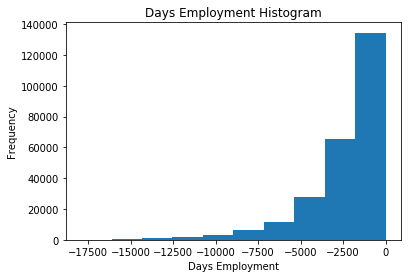

In [24]:
# 新增一個欄位: DAYS_EMPLOYED_ANOM 來標記 DAYS_EMPLOYED 是否異常
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
print(app_train['DAYS_EMPLOYED_ANOM'].value_counts())

# 這邊我們用 nan 將異常值取代
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [25]:
app_train.OWN_CAR_AGE.isnull()

0          True
1          True
2         False
3          True
4          True
5          True
6         False
7         False
8          True
9          True
10         True
11         True
12         True
13        False
14         True
15        False
16         True
17         True
18         True
19         True
20        False
21        False
22         True
23         True
24        False
25         True
26         True
27         True
28        False
29         True
          ...  
307481     True
307482    False
307483     True
307484    False
307485     True
307486    False
307487     True
307488     True
307489     True
307490     True
307491    False
307492    False
307493     True
307494    False
307495    False
307496     True
307497    False
307498    False
307499     True
307500     True
307501     True
307502     True
307503     True
307504     True
307505     True
307506     True
307507     True
307508     True
307509     True
307510     True
Name: OWN_CAR_AGE, Lengt

In [26]:
~app_train.OWN_CAR_AGE.isnull()

0         False
1         False
2          True
3         False
4         False
5         False
6          True
7          True
8         False
9         False
10        False
11        False
12        False
13         True
14        False
15         True
16        False
17        False
18        False
19        False
20         True
21         True
22        False
23        False
24         True
25        False
26        False
27        False
28         True
29        False
          ...  
307481    False
307482     True
307483    False
307484     True
307485    False
307486     True
307487    False
307488    False
307489    False
307490    False
307491     True
307492     True
307493    False
307494     True
307495     True
307496    False
307497     True
307498     True
307499    False
307500    False
307501    False
307502    False
307503    False
307504    False
307505    False
307506    False
307507    False
307508    False
307509    False
307510    False
Name: OWN_CAR_AGE, Lengt

In [29]:
app_train[app_train.OWN_CAR_AGE.isnull()]['OWN_CAR_AGE']

0        NaN
1        NaN
3        NaN
4        NaN
5        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
14       NaN
16       NaN
17       NaN
18       NaN
19       NaN
22       NaN
23       NaN
25       NaN
26       NaN
27       NaN
29       NaN
30       NaN
31       NaN
32       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
40       NaN
          ..
307470   NaN
307471   NaN
307472   NaN
307475   NaN
307476   NaN
307477   NaN
307478   NaN
307479   NaN
307480   NaN
307481   NaN
307483   NaN
307485   NaN
307487   NaN
307488   NaN
307489   NaN
307490   NaN
307493   NaN
307496   NaN
307499   NaN
307500   NaN
307501   NaN
307502   NaN
307503   NaN
307504   NaN
307505   NaN
307506   NaN
307507   NaN
307508   NaN
307509   NaN
307510   NaN
Name: OWN_CAR_AGE, Length: 202929, dtype: float64

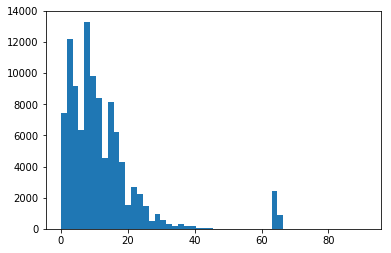

In [36]:
# 檢查 OWN_CAR_AGE: 貸款人的車齡
plt.hist(app_train[~app_train.OWN_CAR_AGE.isnull()]['OWN_CAR_AGE'], bins=52)
plt.show()

In [39]:
app_train['OWN_CAR_AGE'].value_counts().head(15)

7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
4.0     5557
1.0     5280
9.0     5020
10.0    4806
14.0    4594
13.0    4566
12.0    4257
11.0    4161
5.0     3595
15.0    3580
Name: OWN_CAR_AGE, dtype: int64

In [40]:
app_train[app_train['OWN_CAR_AGE'] > 50]['OWN_CAR_AGE'].value_counts()

64.0    2443
65.0     891
54.0      12
55.0       4
51.0       3
91.0       2
63.0       2
57.0       1
69.0       1
52.0       1
56.0       1
Name: OWN_CAR_AGE, dtype: int64

### 從上面我們可以發現車齡為 64, 65 的人特別多，是否合理?
* 記得，這沒有正確答案 - 但我們總是可以給他們一些標記，讓最後的模型來決定

In [41]:
print("Target of OWN_CAR_AGE >= 50: %.2f%%" % (app_train[app_train['OWN_CAR_AGE'] >= 50]['TARGET'].mean() * 100 ))
print("Target of OWN_CAR_AGE < 50: %.2f%%" % (app_train[app_train['OWN_CAR_AGE'] < 50]['TARGET'].mean() * 100))

app_train['OWN_CAR_AGE_ANOM'] = app_train['OWN_CAR_AGE'] >= 50

Target of OWN_CAR_AGE >= 50: 8.36%
Target of OWN_CAR_AGE < 50: 7.21%
